In [25]:
import pandas as pd
file="./review_complete.csv"
df_sentiment=pd.read_csv(file)

In [26]:
df_sentiment.head()

,Unnamed: 0,listing_id,id,date,reviewer_id,reviewer_name,comments,type,len,detect
0,0,958,5977,2009-07-23,15695,Edmund C,"Our experience was, without a doubt, a five st...",str,485,en
1,1,958,6660,2009-08-03,26145,Simon,Returning to San Francisco is a rejuvenating t...,str,406,en
2,2,958,11519,2009-09-27,25839,Denis,We were very pleased with the accommodations a...,str,780,en
3,3,958,16282,2009-11-05,33750,Anna,We highly recommend this accomodation and agre...,str,504,en
4,4,958,26008,2010-02-13,15416,Venetia,Holly's place was great. It was exactly what I...,str,236,en


In [13]:
%run ./Text_Normalization_Function.ipynb

  Could not find a version that satisfies the requirement html.parser (from versions: )
No matching distribution found for html.parser
You are using pip version 18.1, however version 19.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


You are using pip version 18.1, however version 19.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


You are using pip version 18.1, however version 19.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


Original:   <p>The circus dog in a plissé skirt jumped over Python who wasn't that large, just 3 feet long.</p>
Processed:  ['<', 'p', '>', 'The', 'circus', 'dog', 'in', 'a', 'plissé', 'skirt', 'jumped', 'over', 'Python', 'who', 'was', "n't", 'that', 'large', ',', 'just', '3', 'feet', 'long.', '<', '/p', '>']
Original:   <p>The circus dog in a plissé skirt jumped over Python who wasn't that large, just 3 feet long.</p>
Processed:  <p>The circus dog in a plissé skirt jumped over Python who was not that large, just 3 feet long.</p>
Original:   <p>The circus dog in a plissé skirt jumped over Python who wasn't that large, just 3 feet long.</p>
Processed:  [('<', 'a'), ('p', 'n'), ('>', 'v'), ('the', None), ('circus', 'n'), ('dog', 'n'), ('in', None), ('a', None), ('plissé', 'n'), ('skirt', 'n'), ('jumped', 'v'), ('over', None), ('python', 'n'), ('who', None), ('was', 'v'), ("n't", 'r'), ('that', None), ('large', 'a'), (',', None), ('just', 'r'), ('3', None), ('feet', 'n'), ('long.', 'a'), 

In [38]:
import pandas as pd
import numpy as np
import sys
import nltk
import warnings
warnings.simplefilter(action='ignore')

In [39]:
nltk.download('vader_lexicon')

from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [119]:
df_sentiment_select=df_sentiment.iloc[:10000]
text_test=np.array(df_sentiment_select["comments"])[0]

In [108]:
def analyze_sentiment_vader_lexicon_sentiment(review, 
                                    threshold = 0.1,
                                    verbose = False):
    
    #pre-process text
    review = normalize_accented_characters(review)
    review = html_parser.unescape(review)
    review = strip_html(review)
    
    #analyze the sentiment for review
    analyzer = SentimentIntensityAnalyzer()
    scores = analyzer.polarity_scores(review)
    
    #get binary sentiment
    binary_sentiment = 'positive' if scores['compound'] >= threshold\
                                   else 'negative'
    
    if verbose:
        
        #display sentiment 
        sentiment_frame = pd.DataFrame([[binary_sentiment, round(scores['compound'], 2)]],
                                        columns=pd.MultiIndex(levels=[['SENTIMENT STATS:'], 
                                                                      ['Binary Sentiment ', 'Polarity Score']], 
                                                              labels=[[0,0],[0,1]]))
        print(sentiment_frame.to_string(index=False))
    
    return binary_sentiment  

In [109]:
def analyze_sentiment_vader_lexicon_score(review, 
                                    threshold = 0.1,
                                    verbose = False):
    
    #pre-process text
    review = normalize_accented_characters(review)
    review = html_parser.unescape(review)
    review = strip_html(review)
    
    #analyze the sentiment for review
    analyzer = SentimentIntensityAnalyzer()
    scores = analyzer.polarity_scores(review)
    
    #get binary sentiment
    binary_sentiment = 'positive' if scores['compound'] >= threshold\
                                   else 'negative'
    
    if verbose:
        
        #display sentiment 
        sentiment_frame = pd.DataFrame([[binary_sentiment, round(scores['compound'], 2)]],
                                        columns=pd.MultiIndex(levels=[['SENTIMENT STATS:'], 
                                                                      ['Binary Sentiment ', 'Polarity Score']], 
                                                              labels=[[0,0],[0,1]]))
        print(sentiment_frame.to_string(index=False))
    
    return scores['compound'] 

In [110]:
final_sentiment = analyze_sentiment_vader_lexicon_sentiment(text_test,
                                                        threshold=0.1,
                                                        verbose=True)

SENTIMENT STATS:               
Binary Sentiment  Polarity Score
        positive           0.96


In [120]:
df_sentiment_select['sentiment']=pd.DataFrame(df_sentiment_select.comments.apply(analyze_sentiment_vader_lexicon_sentiment))
df_sentiment_select['score']=pd.DataFrame(df_sentiment_select.comments.apply(analyze_sentiment_vader_lexicon_score))

df_sentiment_select[['listing_id','reviewer_id','reviewer_name','comments','sentiment','score']].head()


,listing_id,reviewer_id,reviewer_name,comments,sentiment,score
0,958,15695,Edmund C,"Our experience was, without a doubt, a five st...",positive,0.9590
1,958,26145,Simon,Returning to San Francisco is a rejuvenating t...,positive,0.9819
2,958,25839,Denis,We were very pleased with the accommodations a...,positive,0.7600
3,958,33750,Anna,We highly recommend this accomodation and agre...,positive,0.9840
4,958,15416,Venetia,Holly's place was great. It was exactly what I...,positive,0.9617


In [205]:
mean_score=pd.DataFrame(df_sentiment_select.groupby("listing_id")["score"].mean()).reset_index()

In [206]:
df_listing=pd.read_csv("./listings.csv/listings.csv")

In [233]:
df_listing.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       ...
       'instant_bookable', 'is_business_travel_ready', 'cancellation_policy',
       'require_guest_profile_picture', 'require_guest_phone_verification',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'reviews_per_month'],
      dtype='object', length=106)

In [234]:
df_listing["require_guest_phone_verification"]

0       f
1       f
2       f
3       f
4       t
5       f
6       f
7       f
8       f
9       f
10      f
11      f
12      f
13      f
14      f
15      t
16      f
17      f
18      f
19      t
20      f
21      t
22      f
23      t
24      t
25      t
26      f
27      t
28      f
29      f
       ..
7121    f
7122    f
7123    f
7124    f
7125    f
7126    f
7127    f
7128    f
7129    f
7130    f
7131    f
7132    f
7133    f
7134    f
7135    f
7136    f
7137    f
7138    f
7139    f
7140    f
7141    t
7142    f
7143    f
7144    f
7145    f
7146    f
7147    f
7148    f
7149    f
7150    f
Name: require_guest_phone_verification, Length: 7151, dtype: object

In [227]:
df_superhost=mean_score.merge(df_listing,left_on='listing_id',right_on="id")[["id","score","cancellation_policy"]]
df_superhost_score=pd.DataFrame(df_superhost.groupby("cancellation_policy")["score"].mean()).reset_index()
df_superhost_score

,cancellation_policy,score
0,flexible,0.913907
1,moderate,0.890096
2,strict_14_with_grace_period,0.847983
3,super_strict_30,0.784742


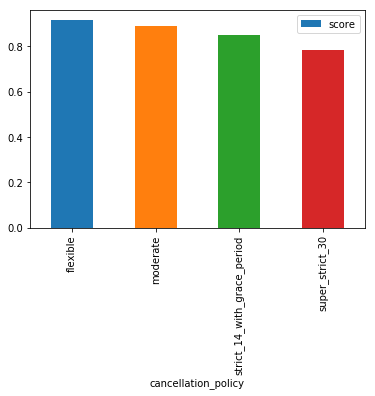

In [228]:
%matplotlib inline
df_superhost_score.plot(kind="bar",x="cancellation_policy",y="score")

In [235]:
df_sentiment_select[df_sentiment_select["sentiment"]=="negative"].shape

(182, 12)

In [138]:
#Sample 10000
n=1000
df_sample=df_sentiment.sample(n)

In [237]:
df_sample['sentiment']=pd.DataFrame(df_sample.comments.apply(analyze_sentiment_vader_lexicon_sentiment))
df_sample['score']=pd.DataFrame(df_sample.comments.apply(analyze_sentiment_vader_lexicon_score))

#df_sample[['listing_id','reviewer_id','reviewer_name','comments','sentiment','score']].loc[1:"comments"]


KeyboardInterrupt: 

In [140]:
df_sample[df_sample["sentiment"]=="negative"]

,Unnamed: 0,listing_id,id,date,reviewer_id,reviewer_name,comments,type,len,detect,sentiment,score
75021,80032,1672896,126671818,2017-01-13,8755608,Nicky,This accommodation is comfortable but the ants...,str,528,en,negative,-0.3716
46326,49158,767506,49304939,2015-10-02,26068498,Jeni,The host canceled this reservation 20 days bef...,str,88,en,negative,0.0000
36910,39015,585326,290095222,2018-07-13,7729706,Kevin,You will not find a better a better place for ...,str,99,en,negative,-0.2544
134365,143945,4902855,49124161,2015-10-01,37527172,Maarten,Pro's \r\nLocation: If you don't mind walking ...,str,335,en,negative,-0.3855
264713,284608,21248363,282219143,2018-06-26,191041414,Richard,"First airbnb experience for me, although have ...",str,536,en,negative,0.0624
87194,93250,2126868,317857535,2018-09-02,10285904,Yi,The space is very interesting and is in a quie...,str,448,en,negative,0.0704
137194,147019,5007358,38622766,2015-07-17,17983869,Faber,"We were met by the manager, Lloyd, who was ver...",str,654,en,negative,-0.6322
165574,177427,7715542,72044592,2016-04-30,54988298,Georgina,"The description of the place is very accurate,...",str,1564,en,negative,-0.5849
248159,266700,18585116,168605849,2017-07-09,676999,Elena,The host canceled this reservation 5 days befo...,str,87,en,negative,0.0000
166388,178296,7823272,414453904,2019-02-19,119873816,Amber,During our 3 night stay we were pleased with t...,str,491,en,negative,-0.0772


In [141]:
df_sentiment_train=df_sample.drop(columns=['score'])

The following will treat the sample dataset which contains 100 records as our train data set

In [142]:
df_sentiment_train.head()

,Unnamed: 0,listing_id,id,date,reviewer_id,reviewer_name,comments,type,len,detect,sentiment
42163,44672,713877,11534762,2014-04-07,11852290,Yvonne,"Great location, clean, good bed, great view! C...",str,136,en,positive
75021,80032,1672896,126671818,2017-01-13,8755608,Nicky,This accommodation is comfortable but the ants...,str,528,en,negative
113781,121705,3718865,44833805,2015-08-29,20417743,Heather,"Katie's place was warm, clean, and cozy. Exact...",str,143,en,positive
123718,132480,4365969,99152157,2016-09-03,19632484,Leslie,Leslie is a pleasant and informative host who ...,str,566,en,positive
82361,87960,1985338,310663051,2018-08-19,16861388,Pau,Nichole and Julien’s apartment is great option...,str,538,en,positive


In [145]:
#Sample 10000
n=10000
df_sample=df_sentiment.sample(n)
df_sentiment_test=df_sample

In [146]:
norm_comments_train = normalize_corpus(df_sentiment_train['comments'])
norm_comments_test = normalize_corpus(df_sentiment_test['comments'])

In [147]:
print('RAW TEXT: ', np.array(df_sentiment_test['comments'])[0])
print()
print('NORMALIZED TEXT: ', norm_comments_test[0])

RAW TEXT:  Maria's place was really nice and cozy. The pictures don't do it enough justice, and Maria herself was very helpful and made sure we were well taken care of. I would highly recommend this place of you're staying in San Francisco.

NORMALIZED TEXT:  maria place really nice cozy picture enough justice maria helpful made sure well take care highly recommend place stay san francisco


In [170]:
vectorizer = TfidfVectorizer(ngram_range = (1,2)) 
feature_matrix_TRAIN = vectorizer.fit_transform(norm_comments_train).astype(float)

vectorizer_alt = TfidfVectorizer(ngram_range = (1,1)) 
feature_matrix_TRAIN_alt = vectorizer_alt.fit_transform(norm_comments_train).astype(float)

In [150]:
feature_matrix_TRAIN_names = vectorizer.get_feature_names() 
feature_matrix_TRAIN_table = pd.DataFrame(data = feature_matrix_TRAIN.todense(), 
                                          columns = feature_matrix_TRAIN_names)
feature_matrix_TRAIN_table.head(5)

,10am,10am share,10mn,10mn maximum,10p,10p 8a,10pm,10pm noisy,1900s,1900s hear,...,zacks apartment,zain,zain actually,zain easily,zain last,zain lol,zone,zoo,zoo easily,zoo fantastic
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [171]:
feature_matrix_TEST = vectorizer.transform(norm_comments_test)
feature_matrix_TEST_alt = vectorizer_alt.transform(norm_comments_test)

In [154]:
from sklearn import linear_model

sent_analysis_svm = linear_model.SGDClassifier(loss='hinge') 
sent_analysis_svm.fit(feature_matrix_TRAIN, df_sentiment_train['sentiment'])
predicted_svm = sent_analysis_svm.predict(feature_matrix_TEST) 


In [173]:
sent_analysis_svm_alt = linear_model.SGDClassifier(loss='hinge') 
sent_analysis_svm_alt.fit(feature_matrix_TRAIN_alt, df_sentiment_train['sentiment'])
predicted_svm_alt = sent_analysis_svm_alt.predict(feature_matrix_TEST_alt)

In [156]:
sample_ids = [0, 30, 330, 851, 951, 995] 

In [157]:
for com_index in sample_ids:
    print('Review:-')
    print(np.array(df_sentiment_test['comments'])[com_index])
    print('Actual Labeled Sentiment:', np.array(df_sentiment_test['comments'])[com_index])
    print('Predicted Sentiment:', predicted_svm[com_index])   
    print()

Review:-
Maria's place was really nice and cozy. The pictures don't do it enough justice, and Maria herself was very helpful and made sure we were well taken care of. I would highly recommend this place of you're staying in San Francisco.
Actual Labeled Sentiment: Maria's place was really nice and cozy. The pictures don't do it enough justice, and Maria herself was very helpful and made sure we were well taken care of. I would highly recommend this place of you're staying in San Francisco.
Predicted Sentiment: positive

Review:-
The unit was exactly as described, perfect for a short term stay. It's located in a prime location with everything you could need within walking distance, including a muni stopped feet from the door. Eric is a great host, extremely friendly and helpful.
Actual Labeled Sentiment: The unit was exactly as described, perfect for a short term stay. It's located in a prime location with everything you could need within walking distance, including a muni stopped feet 

In [161]:
df_sentiment_test["predicted_sentiment"]=predicted_svm
df_sentiment_test.head()

,Unnamed: 0,listing_id,id,date,reviewer_id,reviewer_name,comments,type,len,detect,predicted_sentiment
201730,216169,12026845,203290144,2017-10-14,54583488,Bikramjeet,Maria's place was really nice and cozy. The pi...,str,229,en,positive
37922,40088,598271,22064425,2014-10-29,3943516,Iain,"Fran was a great host, very well organised and...",str,576,en,positive
109063,116681,3333870,107673284,2016-10-11,4000131,Emily,Nancy was a great host with a great pad!,str,40,en,positive
90232,96522,2236226,14551147,2014-06-22,11284494,Melissa,We stayed at David's apartment for four nights...,str,655,en,positive
90588,96907,2263794,275772077,2018-06-11,193120219,Katy,Quick responses. Super friendly. Nice condo wi...,str,122,en,positive


In [162]:
df_sentiment_test['sentiment']=pd.DataFrame(df_sentiment_test.comments.apply(analyze_sentiment_vader_lexicon_sentiment))
df_sentiment_test['score']=pd.DataFrame(df_sentiment_test.comments.apply(analyze_sentiment_vader_lexicon_score))

df_sentiment_test[['listing_id','reviewer_id','reviewer_name','comments','sentiment','score']].head()

,listing_id,reviewer_id,reviewer_name,comments,sentiment,score
201730,12026845,54583488,Bikramjeet,Maria's place was really nice and cozy. The pi...,positive,0.9582
37922,598271,3943516,Iain,"Fran was a great host, very well organised and...",positive,0.9829
109063,3333870,4000131,Emily,Nancy was a great host with a great pad!,positive,0.8588
90232,2236226,11284494,Melissa,We stayed at David's apartment for four nights...,positive,0.9822
90588,2263794,193120219,Katy,Quick responses. Super friendly. Nice condo wi...,positive,0.8807


In [247]:
np.array(df_sentiment[df_sentiment["reviewer_id"]==12434648]["comments"])

array(['Not a nice Neighborhood ..  for the price of the rental ,far from down town ... it was big enough for a big group ,and had to go buy a coffee maker and a can opener ... Would not stay there again .... '],
      dtype=object)

In [163]:
df_sentiment_test[df_sentiment_test["predicted_sentiment"]!=df_sentiment_test["sentiment"]]

,Unnamed: 0,listing_id,id,date,reviewer_id,reviewer_name,comments,type,len,detect,predicted_sentiment,sentiment,score
103147,110377,3081324,37965660,2015-07-12,12434648,Alexandria,Not a nice Neighborhood .. for the price of t...,str,201,en,positive,negative,-0.3252
217084,232934,14179987,279433406,2018-06-20,95235589,Nora,We were disappointed to find out on arrival th...,str,630,en,positive,negative,-0.7906
103018,110246,3073393,285111367,2018-07-02,117005546,Emmanuelle,Simple and clean flat in a three stories build...,str,109,en,positive,negative,-0.2385
38890,41099,640352,7558084,2013-09-24,8392025,Alex,Tell others in the Airbnb community about your...,str,52,en,positive,negative,0.0000
169462,181562,8033975,45432685,2015-09-02,23344855,Zack,Host made everything seamless,str,29,en,positive,negative,0.0000
177944,190666,8685766,139282083,2017-03-24,46307667,Josef,Very central at Union square close to everything,str,48,en,positive,negative,0.0000
114437,122402,3727061,53953076,2015-11-15,6721312,Frank,The host met us and showed us the flat when we...,str,543,en,positive,negative,0.0607
255940,275096,19904931,191256133,2017-09-06,33995019,Jane,"Pros: Great location, close to cable cars and ...",str,629,en,positive,negative,-0.5829
233544,250783,16228848,353165283,2018-11-26,27746707,Geraldine,Quite expensive for an average service - room ...,str,64,en,positive,negative,-0.2104
81444,87001,1944564,167437541,2017-07-06,560996,Carly,A very unique experience at Brian's studio - i...,str,76,en,positive,negative,0.0000


In [164]:
from sklearn import metrics

true_labels = df_sentiment_test['sentiment']
predicted_labels = predicted_svm
positive_class = 'positive'

print('Accuracy:', np.round(metrics.accuracy_score(true_labels, 
                                                        predicted_labels), 2))

print('Precision:', np.round(metrics.precision_score(true_labels, 
                                                          predicted_labels, 
                                                          pos_label=positive_class, 
                                                          average='binary'), 2)) 

print('Recall:', np.round(metrics.recall_score(true_labels, 
                                                   predicted_labels, 
                                                   pos_label=positive_class, 
                                                   average='binary'), 2)) 

Accuracy: 0.98
Precision: 0.98
Recall: 1.0


In [165]:
import numpy as np
from sklearn.utils import resample
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from matplotlib import pyplot

In [166]:
n_iterations = 100
n_size = 1000
ids = range(1000)

In [174]:
svm_accuracy = np.round(metrics.accuracy_score(np.array(df_sentiment_test['sentiment']), predicted_svm), 3)
svm_accuracy_alt = np.round(metrics.accuracy_score(np.array(df_sentiment_test['sentiment']), predicted_svm_alt), 3)
delta_test = svm_accuracy - svm_accuracy_alt
print("Accuracy prediction, original: ", svm_accuracy)
print("Accuracy prediction, alternative: ", svm_accuracy_alt)
print("Difference in accuracy prediction: ", delta_test)

Accuracy prediction, original:  0.983
Accuracy prediction, alternative:  0.981
Difference in accuracy prediction:  0.0020000000000000018


In [176]:
svm_accuracy_boot = list()
#svm_accuracy_boot_alt = list()
s = 0

for i in range(n_iterations):
    
    #prepare a pseudo test set
    test_ids = resample(ids, n_samples = n_size)
    actual_sentiments = np.array(df_sentiment_test['sentiment'])[test_ids]
    
    #compute predictions on the pseudo sample
    svm_predicted = sent_analysis_svm.predict(feature_matrix_TEST[test_ids])
    svm_predicted_alt = sent_analysis_svm_alt.predict(feature_matrix_TEST_alt[test_ids])
    
    #compute accuracy for the pseudo sample
    svm_accuracy_boot_iter = metrics.accuracy_score(np.array(df_sentiment_test['sentiment'])[test_ids], svm_predicted)
    svm_accuracy_boot_iter_alt = metrics.accuracy_score(np.array(df_sentiment_test['sentiment'])[test_ids], svm_predicted_alt)

    delta = svm_accuracy_boot_iter - svm_accuracy_boot_iter_alt
    
    if delta > 2*delta_test:
        s = s+1
    
    pvalue = float(s)/n_iterations
    
    svm_accuracy_boot.append(svm_accuracy_boot_iter)
    svm_accuracy_boot_alt.append(svm_accuracy_boot_iter_alt)

p-value:  0.0
Mean accuracy for Original Model:  0.985
Mean accuracy for Alternative Model:  0.984


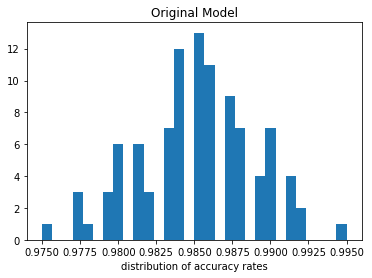

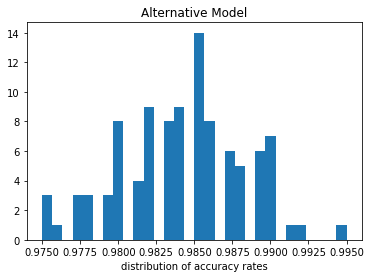

In [177]:
print('p-value: ', pvalue)
print('Mean accuracy for Original Model: ', np.round(np.mean(svm_accuracy_boot),3))
print('Mean accuracy for Alternative Model: ', np.round(np.mean(svm_accuracy_boot_alt),3))


import matplotlib.pyplot as plt

plt.hist(svm_accuracy_boot,bins = 30)
plt.xlabel("distribution of accuracy rates")
plt.title("Original Model")
plt.show()

plt.hist(svm_accuracy_boot_alt,bins = 30)
plt.xlabel("distribution of accuracy rates")
plt.title("Alternative Model")
plt.show()

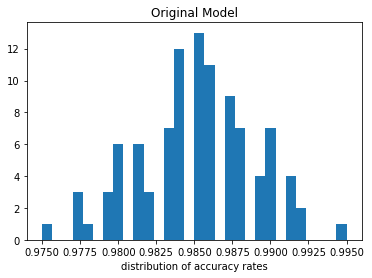

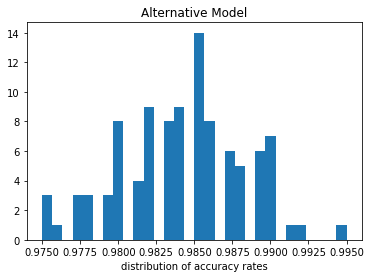

In [178]:
import matplotlib.pyplot as plt

plt.hist(svm_accuracy_boot,bins = 30)
plt.xlabel("distribution of accuracy rates")
plt.title("Original Model")
plt.show()

plt.hist(svm_accuracy_boot_alt,bins = 30)
plt.xlabel("distribution of accuracy rates")
plt.title("Alternative Model")
plt.show()

In [179]:
n=100000
df_new_sample=df_sentiment.sample(n)

In [180]:
df_new_sample['sentiment']=pd.DataFrame(df_new_sample.comments.apply(analyze_sentiment_vader_lexicon_sentiment))
df_new_sample['score']=pd.DataFrame(df_new_sample.comments.apply(analyze_sentiment_vader_lexicon_score))

df_new_sample[['listing_id','reviewer_id','reviewer_name','comments','sentiment','score']].head()

,listing_id,reviewer_id,reviewer_name,comments,sentiment,score
223488,14990478,108228687,Angelica,This cozy cottage definitely lived up to its n...,positive,0.9512
41820,691023,4749594,Alex,"Really lovely home, right next to a lively par...",positive,0.9611
253148,19331975,39671183,Hannah,"We really loved this Loft, especially the view...",positive,0.8746
71407,1525137,50336203,Mallory,Exceeded my expectations. Very thoughtful host...,positive,0.8772
166859,7854509,5244765,Stephanie,Great space in a lovely neighborhood. Penny's ...,positive,0.9545


In [183]:
df_negative=df_new_sample[df_new_sample["sentiment"]=="negative"]

In [184]:
df_negative.to_csv("negative1.csv")

In [192]:
df_negative.groupby(["listing_id"]).count().sort_values(by=['id'],ascending=False)

,Unnamed: 0,id,date,reviewer_id,reviewer_name,comments,type,len,detect,sentiment,score
listing_id,,,,,,,,,,,
4902855,13,13,13,13,13,13,13,13,13,13,13
4902907,13,13,13,13,13,13,13,13,13,13,13
5550248,10,10,10,10,10,10,10,10,10,10,10
1633173,9,9,9,9,9,9,9,9,9,9,9
997382,9,9,9,9,9,9,9,9,9,9,9
16086843,8,8,8,8,8,8,8,8,8,8,8
9532943,8,8,8,8,8,8,8,8,8,8,8
16029428,8,8,8,8,8,8,8,8,8,8,8
4909117,7,7,7,7,7,7,7,7,7,7,7


In [195]:
df_negative[df_negative["listing_id"]==4902855].to_csv("negative_4902855.csv")